## EDA
Working with filtered images and filtered annotations

In [66]:
annotations = "filtered_images/annotations/instances_filtered.json"

### Explore the annotations

In [6]:
## read json file
import json
from collections import defaultdict

with open(annotations, 'r') as file:
    data = json.load(file)

print("top level keys", data.keys())

top level keys dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])


#### Explore images

In [8]:
print(f"\nNumber of images:{len(data['images'])}")
print(f"Sample image entry: {data['images'][0]}")


Number of images:119
Sample image entry: {'license': 3, 'file_name': '000000557067.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000557067.jpg', 'height': 374, 'width': 500, 'date_captured': '2013-11-20 22:41:15', 'flickr_url': 'http://farm4.staticflickr.com/3381/3421303403_3dc5bb0d39_z.jpg', 'id': 557067}


#### Explore categories

In [13]:
print(f"\nNumber of categories:{len(data['categories'])}")
print("Categories:", [category['name'] for category in data['categories']])


Number of categories:5
Categories: ['tv', 'laptop', 'mouse', 'keyboard', 'cell phone']


#### Explore annotations

In [16]:
print(f"\nNumber of annotations:{len(data['annotations'])}")
print(f"Sample annotation entry: {data['annotations'][0]}")


Number of annotations:235
Sample annotation entry: {'segmentation': [[27.72, 178.68, 17.56, 184.7, 17.56, 190.34, 49.17, 193.86, 53.06, 189.97, 53.19, 184.7, 44.91, 182.31, 41.02, 180.56, 38.63, 177.55, 32.11, 177.17, 30.48, 178.93, 29.85, 178.93]], 'area': 403.87925000000035, 'iscrowd': 0, 'image_id': 557067, 'bbox': [17.56, 177.17, 35.63, 16.69], 'category_id': 73, 'id': 2227525}


#### Image counts per category

In [17]:
category_image_count = defaultdict(int)

In [21]:
# convierto id to name para que sean las keys del dict
category_id_to_name = {cat['id']:cat['name'] for cat in data['categories']}
category_id_to_name

{72: 'tv', 73: 'laptop', 74: 'mouse', 76: 'keyboard', 77: 'cell phone'}

In [28]:
# Count the number of images per category
for annotation in data['annotations']:
    category_image_count[category_id_to_name[annotation['category_id']]] +=1

print("\nImage count per category:")
for category, count in category_image_count.items():
    print(f"{category}: {count} images")


Image count per category:
laptop: 153 images
tv: 180 images
cell phone: 144 images
keyboard: 126 images
mouse: 102 images


### Visualization

In [33]:
import matplotlib.pyplot as plt
import cv2 as cv
import random
import os

In [40]:
images_path = "./filtered_images/images/"

'000000480000.jpg'

In [64]:
def show_any_image():
    img = cv.imread(images_path + random.choice(os.listdir(images_path)))
    plt.imshow(img)

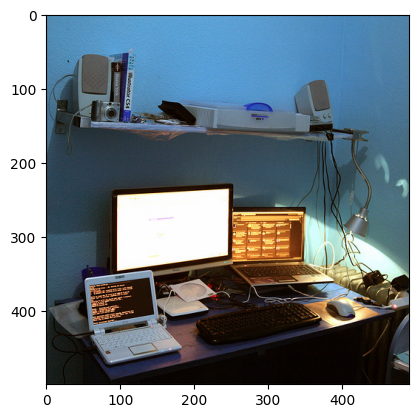

In [65]:
show_any_image()

### Visualización de imagenes con bounding boxes

## EDA
height width
bounding boxes, sizes, aspect ratio
distribution of categories
annotations per image